In [1]:
import pandas as pd
import os, sys
import os.path
import argparse
import shutil
import numpy as np
from glob import iglob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn and change a few global variables to
# alter the aesthetic of the below plots
import seaborn as sns
sns.set(
    font_scale=1, # make the font larger; default is pretty small
    style='darkgrid', # make the background white with black lines
    palette='colorblind' # a color palette that is colorblind friendly!
)
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]

def parse_score_file(filename):
    try:
        score_file = open(filename).readlines()
    except FileNotFoundError:
        print("{} not found!".format(filename))
        sys.exit(1)

    headers = score_file[1].split()[1:]
    score_data = [line.split()[1:] for line in score_file[2:]]
    return headers, score_data

def process_data(data):
    headers, score_data = parse_score_file(data)
    scores = pd.DataFrame(score_data, columns=headers, dtype=float)
    scores.dropna(inplace=True)
    #scores = scores[(scores['total_score'] < -2000 )]
    scores['score_per_res'] = scores['total_score'] / 3784
    scores['%score_deviation'] = - ( scores['score_per_res'] - scores['score_per_res'].mean() ) / scores['score_per_res'].mean()
    scores[['total_score', 'score_per_res', '%score_deviation' ]].head()
    scores['Rotation_Translation'] = scores['description'].apply(lambda s:s.split('_')[3])
    
    scores['Rotation_angle'] = scores['description'][0:2]
    scores['Rotation_angle'] = scores['description'].apply(lambda s:s.split('_')[3])
    scores['Rotation_angle_float'] = scores['Rotation_angle'].astype(float)
    scores['Rotation_angle_float_rad'] = scores['Rotation_angle_float']* np.pi / 180
    scores.groupby('Rotation_angle_float', as_index=False).mean()
    scores['total_score_mean'] = scores['total_score'].astype(float)
    scores['total_score_sd'] = scores['total_score'].astype(float)
    scores['score_per_res_mean'] = scores['score_per_res'].astype(float)
    scores['score_per_res_sd'] = scores['score_per_res'].astype(float)
    scores['%score_deviation_mean'] = scores['%score_deviation'].astype(float)
    scores['%score_deviation_sd'] = scores['%score_deviation'].astype(float)
    scores2 = scores.groupby(['Rotation_angle_float']).agg({'total_score_mean': 'mean', 'total_score_sd': 'std','score_per_res_mean': 'mean', 'score_per_res_sd': 'std','%score_deviation_mean': 'mean', '%score_deviation_sd': 'std'})
    scores2 = scores2.reset_index()
    scores2['Rotation_angle_float_rad'] = scores2['Rotation_angle_float']* np.pi / 180
    sorted_scores = scores2.sort_values('Rotation_angle_float', ascending=True)
    return sorted_scores


#scores_7CGO = process_data("FD_score_old.sc")
scores_7CGO = process_data("energy_scores.sc")
scores_7CGO.to_csv('scores_7CGO_centered.csv')


In [ ]:
#def find_the_interface_res(pose_axle_and_rotor,sym_ax,sym_rot):
sym_ax = 4
sym_rot = 6
    
ABCDetc = re.sub(r'([A-Z])(?!$)', r'\1,', string.ascii_uppercase[0:int(sym_ax)])
FGHIJKetc = re.sub(r'([A-Z])(?!$)', r'\1,', string.ascii_uppercase[int(sym_ax):int(sym_ax)+int(sym_rot)])
chains_axle = ChainSelector(ABCDetc)
chains_rotor = ChainSelector(FGHIJKetc)
interface_on_ax = NeighborhoodResidueSelector(chains_rotor, 10.0, False)
interface_on_rot = NeighborhoodResidueSelector(chains_axle, 10.0, False)
interface_by_vector = pyrosetta.rosetta.core.select.residue_selector.InterGroupInterfaceByVectorSelector(interface_on_ax, interface_on_rot)
interface_by_vector.cb_dist_cut(10.5) #8
interface_by_vector.vector_angle_cut(75)
interface_by_vector.vector_dist_cut(10)

print (FGHIJKetc)

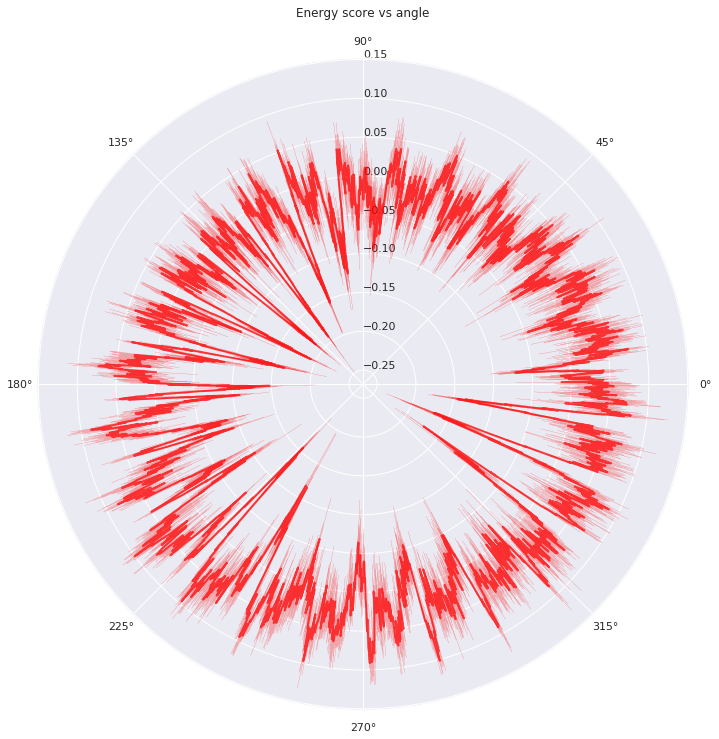

In [4]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_7CGO['Rotation_angle_float_rad'], scores_7CGO['%score_deviation_mean'], yerr = scores_7CGO['%score_deviation_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

ax.set_rlabel_position(90)
#ax.set_ylim(300,500)
ax.set_title("Energy score vs angle", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
plt.savefig('score_deviation_7CGO_centered.png')
plt.show()

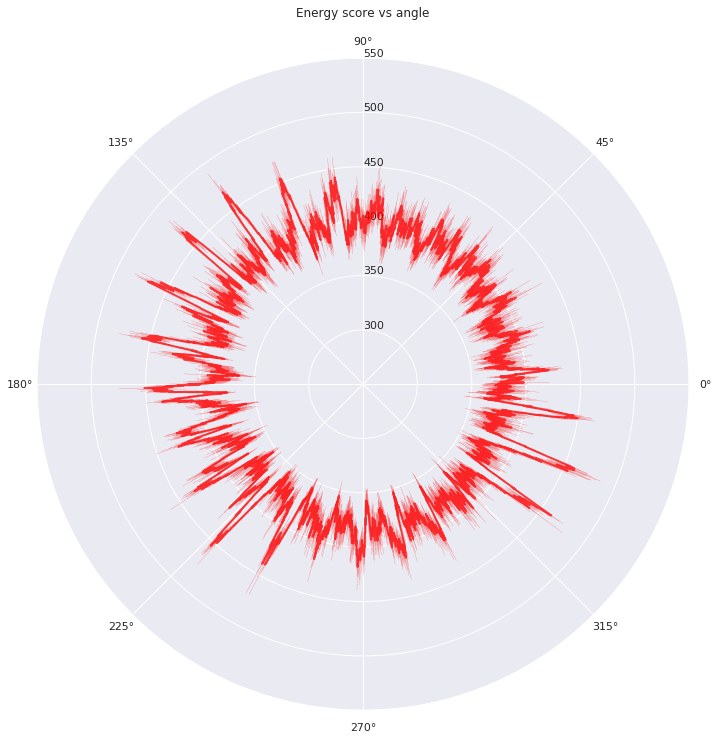

In [3]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_7CGO['Rotation_angle_float_rad'], scores_7CGO['total_score_mean'], yerr = scores_7CGO['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

ax.set_rlabel_position(90)
ax.set_ylim(250,550)
ax.set_title("Energy score vs angle", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
plt.savefig('total_score_7CGO_centered.png')
plt.show()



In [7]:
smallest_scores = scores_7CGO.sort_values('total_score_mean', ascending=False)
smallest_scores

,Rotation_angle_float,total_score_mean,total_score_sd,score_per_res_mean,score_per_res_sd,%score_deviation_mean,%score_deviation_sd,Rotation_angle_float_rad
1543,154.5,469.258778,10.972594,0.124011,0.002900,-0.193775,0.027914,2.696534
1260,126.2,468.762600,13.390317,0.123880,0.003539,-0.192513,0.034064,2.202606
1398,140.0,467.214571,16.332136,0.123471,0.004316,-0.188575,0.041548,2.443461
1540,154.2,466.807111,16.753578,0.123363,0.004427,-0.187538,0.042620,2.691298
1391,139.3,464.628125,15.397036,0.122788,0.004069,-0.181995,0.039169,2.431244
1256,125.8,464.448200,9.960159,0.122740,0.002632,-0.181537,0.025338,2.195624
1262,126.4,463.966556,26.981367,0.122613,0.007130,-0.180312,0.068640,2.206096
1259,126.1,462.506600,9.556011,0.122227,0.002525,-0.176598,0.024310,2.200860
1397,139.9,462.415200,12.586626,0.122203,0.003326,-0.176366,0.032020,2.441716
1401,140.3,462.098200,15.664257,0.122119,0.004140,-0.175559,0.039849,2.448697


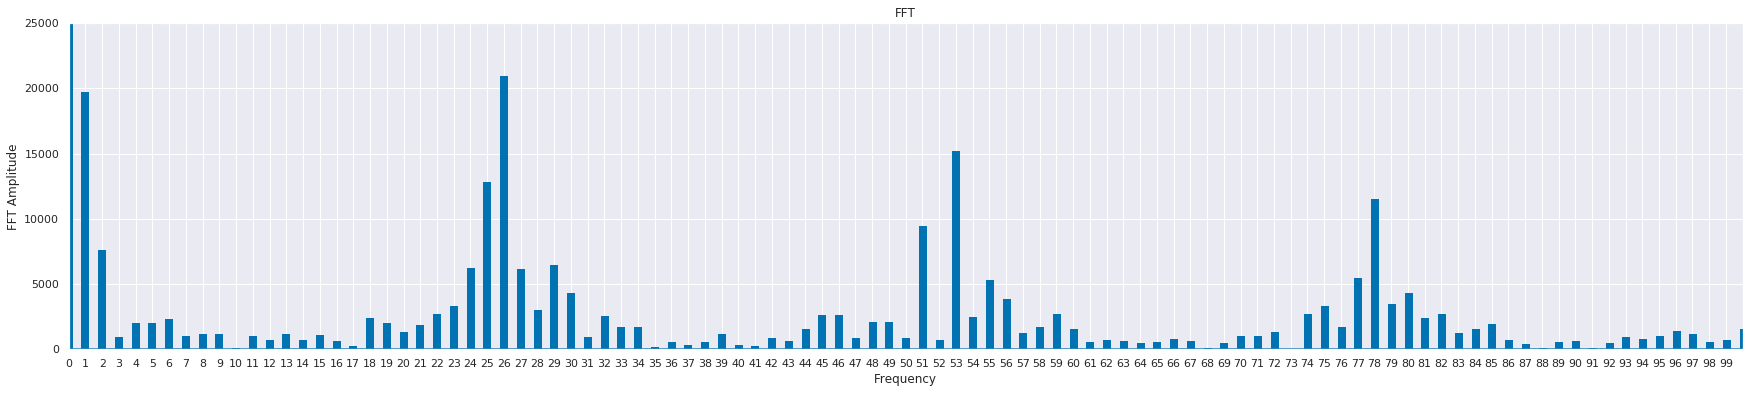

In [5]:
from numpy.fft import fft, ifft
import numpy as np
# FFT the signal
fft_signal = np.array(scores_7CGO['total_score_mean'])
sig_fft = fft(fft_signal)
N = len(sig_fft)
n = np.arange(N)
# get the sampling rate
sr = 3600
#sampling interval
T = N/sr
freq = n/T 


# plot the FFT amplitude
plt.figure(figsize = (30,6))
markerline, stemlines, baseline = plt.stem(freq, np.abs(sig_fft), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 25000)
plt.xticks(np.arange(min(freq), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_7CGO_centered.png')
plt.show()

